In [1]:
import urllib.request
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def request_raytracer(file, sr, sc, wr, wc, roff, coff):
    x = urllib.request.urlopen("http://localhost/r.html?f=%s&sc=%d&sr=%d&wr=%d&wc=%d&roff=%d&coff=%d" % (file, sr, sc, wr, wc, roff, coff)).read()
    return int(x)

In [3]:
d = request_raytracer('wood.txt', 100, 100, 50, 50, 0, 50)

In [4]:
cols = pandas.read_csv('raytracer-master/dynamic_%d.txt' % d)

In [5]:
cols.loc[cols['description'] == 'shade']

,description,value
53,shade,4657.0


In [6]:
def run_raytracer(file, resolution=(100,100), grid=(20,20)):
    mapping = {}
    for roff in range(grid[0]):
        for coff in range(grid[1]):
            wr = resolution[0]/grid[0]
            wc = resolution[1]/grid[1]
            x = request_raytracer(file, resolution[0], resolution[1], wr, wc, wr*roff, wc*coff)
            mapping[(roff, coff)] = x
    return mapping

In [7]:
def get_statistics(feature, mapping, grid):
    output = np.zeros(shape=(grid[1], grid[0]))
    for key in mapping:
        x = key[1]
        y = grid[0] - key[0] - 1
        cols = pandas.read_csv('raytracer-master/dynamic_%d.txt' % mapping[key])
        searched = cols.loc[cols['description'] == feature]
        if (len(searched) == 0):
            value = 0
        else:
            value = searched['value']
        
        output[x, y] = value
    return output.T

In [14]:
def print_image(file, resfile, resolution=(100,100), grid=(10,10)):
    run_result = run_raytracer(file, resolution, grid)
    normalized_output_target = get_statistics('totalinstr', run_result, grid)
    normalized_output_method = get_statistics('dot', run_result, grid)
    plt.subplot(1,3,1)
    imgplot = plt.imshow(normalized_output_target)
    plt.axis('off')
    plt.subplot(1,3,2)
    imgplot = plt.imshow(normalized_output_method)
    plt.axis('off')
    plt.subplot(1,3,3)
    img=mpimg.imread(resfile)/255
    plt.imshow(img)
    plt.axis('off')
    plt.show()

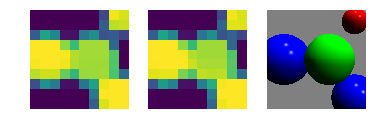

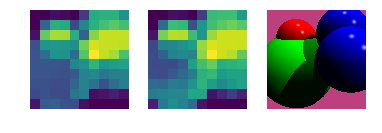

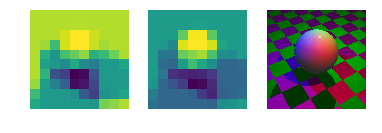

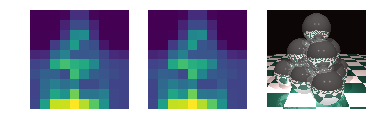

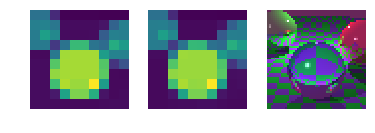

In [15]:
print_image('test01.txt', 'test01final.bmp')
print_image('test02.txt', 'test02final.bmp')
print_image('test03.txt', 'test03final.bmp')
print_image('test04.txt', 'test04final.bmp')
print_image('test05.txt', 'test05final.bmp')